<a href="https://colab.research.google.com/github/EliasSf73/test_/blob/master/DLinearModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adopted Code from D.D.Nolte

 
Duffing.py


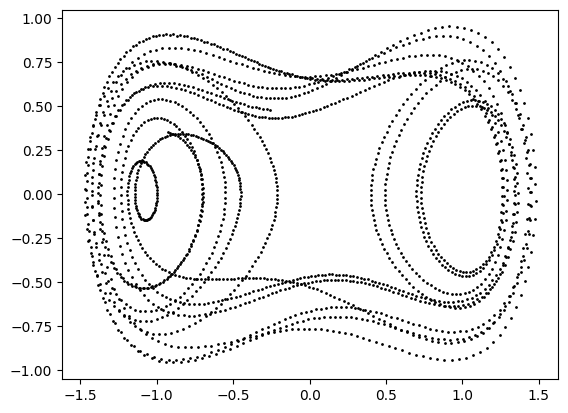

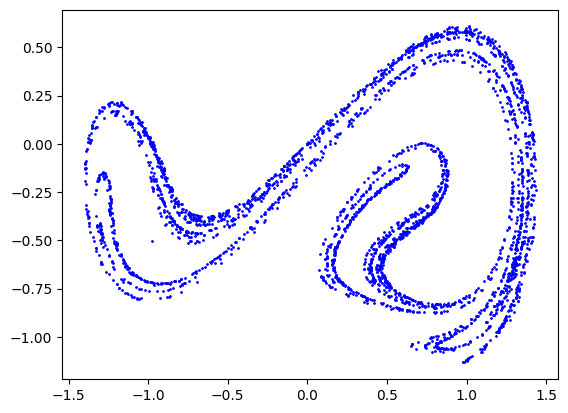

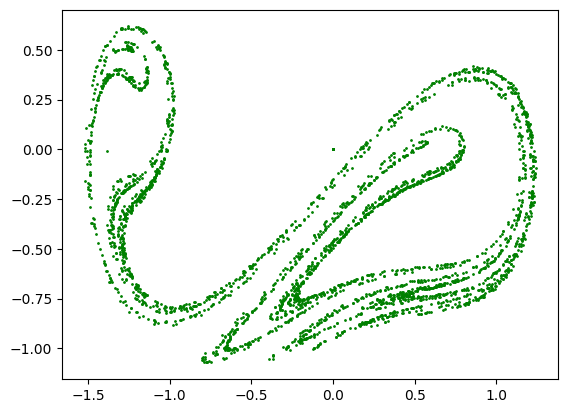

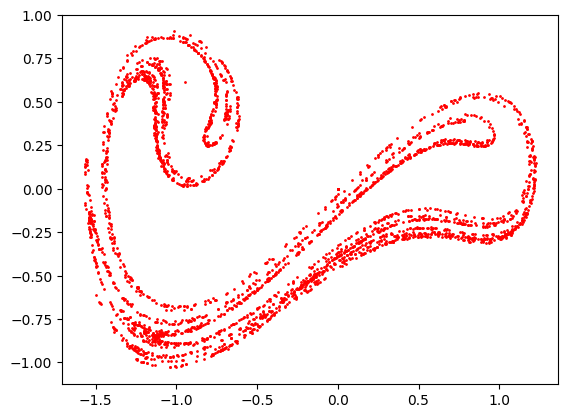

<Figure size 640x480 with 0 Axes>

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Duffing.py
Created on Wed May 21 06:03:32 2018
@author: nolte
D. D. Nolte, Introduction to Modern Dynamics: Chaos, Networks, Space and Time, 2nd ed. (Oxford,2019)
"""
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
from matplotlib import pyplot as plt
from matplotlib import cm
import time
import os

plt.close('all')

# model_case 1 = Pendulum
# model_case 2 = Double Well
print(' ')
print('Duffing.py')

alpha = -1       # -1
beta = 1         # 1
delta = 0.3       # 0.3
gam = 0.15    # 0.15
w = 1
def flow_deriv(x_y_z,tspan):
    x, y, z = x_y_z
    a = y
    b = delta*np.cos(w*tspan) - alpha*x - beta*x**3 - gam*y
    c = w
    # Return a NumPy array
    return np.array([a, b, c])

# initial conditions
T = 2*np.pi/w # period of the driving force

px1 = np.random.rand(1) # position
xp1 = np.random.rand(1) # velocity
w1 = 0 # phase

x_y_z = np.array([xp1[0], px1[0], w1]) # initial state : position,velocity,phase

#  Solve for the trajectories
t = np.linspace(0, 2000, 40000)
x_t = integrate.odeint(flow_deriv, x_y_z, t)
x0 = x_t[39999,0:3]

tspan = np.linspace(1,20000,400000)
x_t = integrate.odeint(flow_deriv, x0, tspan)
siztmp = np.shape(x_t)
siz = siztmp[0]

y1 = x_t[:,0]
y2 = x_t[:,1]
y3 = x_t[:,2]

plt.figure(2)
lines = plt.plot(y1[1:2000],y2[1:2000],'ko',ms=1)
plt.setp(lines, linewidth=0.5)
plt.show()

for cloop in range(0,3):

#phase = np.random.rand(1)*np.pi;
    phase = np.pi*cloop/3

    repnum = 5000
    px = np.zeros(shape=(2*repnum,))
    xvar = np.zeros(shape=(2*repnum,))
    cnt = -1
    testwt = np.mod(tspan-phase,T)-0.5*T;
    last = testwt[1]
    for loop in range(2,siz):
        if (last < 0)and(testwt[loop] > 0):
            cnt = cnt+1
            del1 = -testwt[loop-1]/(testwt[loop] - testwt[loop-1])
            px[cnt] = (y2[loop]-y2[loop-1])*del1 + y2[loop-1]
            xvar[cnt] = (y1[loop]-y1[loop-1])*del1 + y1[loop-1]
            last = testwt[loop]
        else:
            last = testwt[loop]

    plt.figure(3)
    if cloop == 0:
        lines = plt.plot(xvar,px,'bo',ms=1)
    elif cloop == 1:
        lines = plt.plot(xvar,px,'go',ms=1)
    else:
        lines = plt.plot(xvar,px,'ro',ms=1)

    plt.show()

plt.savefig('Duffing')


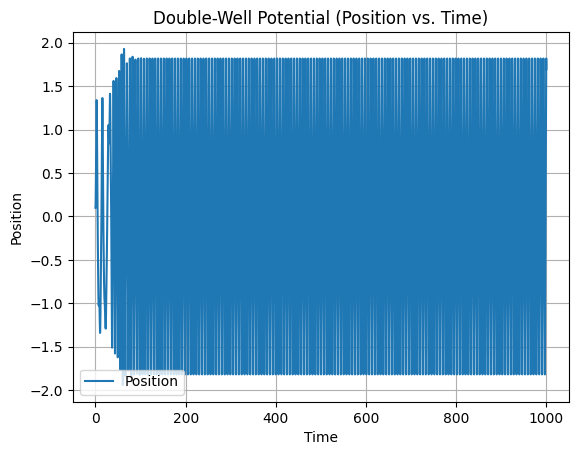

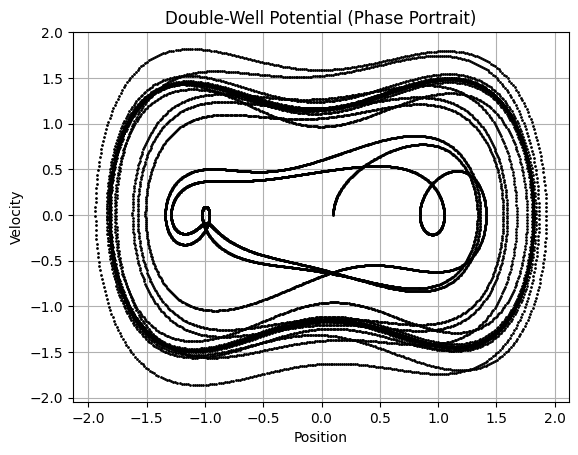

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the double-well potential
m = 1.0       # Mass
c = 0.2       # Damping coefficient
k = -1.0      # Linear stiffness coefficient (negative for double-well)
alpha = 1.0   # Nonlinear stiffness coefficient (positive for double-well)
omega = 1.0   # Driving frequency
delta = 0.5   # Driving amplitude
delta_t = 0.01  # Time step
t_max = 1000  # Maximum time
t = np.arange(0, t_max, delta_t)

# Initial conditions
x = np.zeros_like(t)
v = np.zeros_like(t)
x[0] = 0.1  # Small displacement from the origin
v[0] = 0.0  # Initial velocity

# Define the acceleration function with double-well potential
def acceleration_double_well(x, v, t):
    return - (c * v + k * x + alpha * x**3) / m + delta * np.cos(omega * t)

# Euler method with driving force
for i in range(1, len(t)):
    v[i] = v[i-1] + delta_t * acceleration_double_well(x[i-1], v[i-1], t[i-1])
    x[i] = x[i-1] + delta_t * v[i-1]

# Plot position vs. time
plt.figure()
plt.plot(t, x, label='Position')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Double-Well Potential (Position vs. Time)')
plt.legend()
plt.grid(True)
plt.show()

# Plot phase portrait (position vs. velocity)
plt.figure()
plt.plot(x, v, 'ko', ms=1)
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Double-Well Potential (Phase Portrait)')
plt.grid(True)
plt.show()


# Duffing Equation for Spring with numerical methods

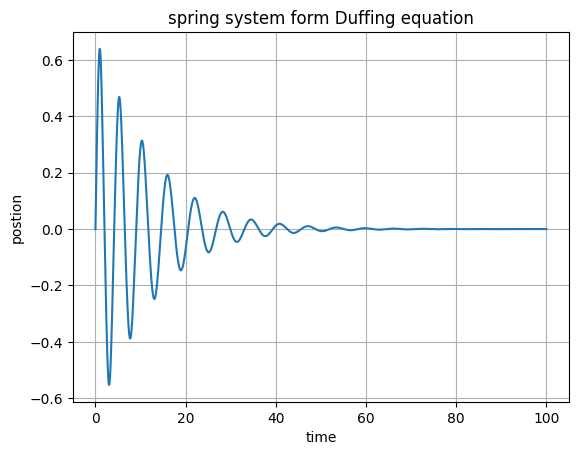

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# parameter intialization
m=1.0 # mass
k=1.0 # spring constant for linear stiffness
c=0.2 # damping coefficient
a=0.2 # nonlinear stiffness, alpha parameter
omega = 1.0 # angular frequency of driving force
delta = 0.0  # driving force's amplitude

# time parameters for numerical methods
delta_t=0.01 # time step
t_max=100 # maximum time
t=np.arange(0,t_max,delta_t) # time array

# Inital conditions of the spring system
x=np.zeros_like(t) # array of position
v=np.zeros_like(t) # array of velocity
x[0]=0.0 # initial position
v[0]=1.0 # initial velocity

# solve for acceleration by assuming F(t)==0
def acceleration(x,v,t):
  return - (c * v + k * x + alpha * x**3) / m + delta * np.cos(omega * t)

#Generate data with numerical method (Euler method here)
for i in range(1,len(t)):
  v[i]=v[i-1]+delta_t*acceleration(x[i-1],v[i-1],t[i-1])
  x[i]=x[i-1]+delta_t*v[i-1]

plt.figure()
plt.plot(t,x,label='position')
plt.xlabel("time")
plt.ylabel('postion')
plt.title('spring system form Duffing equation')
plt.grid(True)
plt.show()


# Phase portrait
plot that shows how velocity varies with displacement

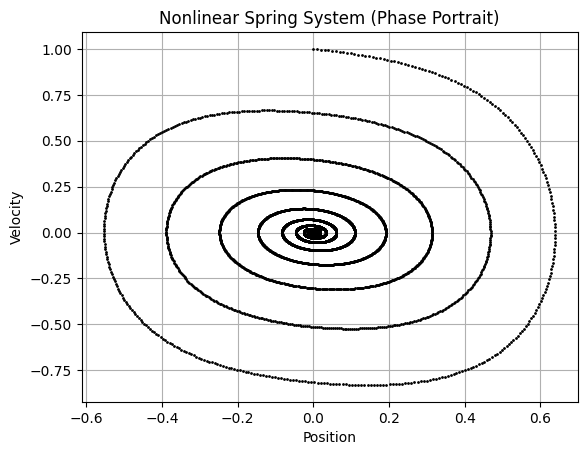

In [ ]:
# Plot position vs. velocity (Phase Portrait)
plt.figure()
plt.plot(x, v, 'ko', ms=1)
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Nonlinear Spring System (Phase Portrait)')
plt.grid(True)
plt.show()

# Poincare section
Insight:
Periodic Motion: If the system is periodic, the Poincaré section will show a finite number of points.
Quasi-Periodic Motion: If the system is quasi-periodic, the section will show a continuous closed curve or torus.
Chaotic Motion: If the system is chaotic, the section will show a scattered set of points, indicating sensitivity to initial conditions.

Poincaré sections help simplify the study of complex dynamics by reducing a continuous system to a discrete set of points, making it easier to identify different types of motion and transitions between them.

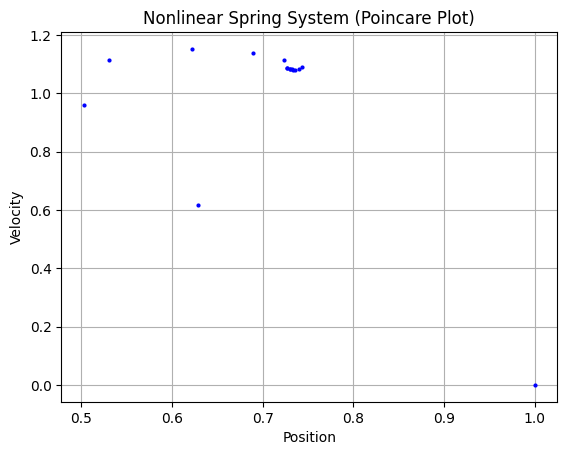

In [ ]:
T= 2*np.pi/omega # time period T of the driving force
# sample the system's state([x,v]) at a given T
poincare_x=[]
poincare_v=[]
for j in range(len(t)):
  if np.abs(t[j]%T)< delta_t:
    poincare_x.append(x[j])
    poincare_v.append(v[j])

# poincare_x vs poincare_v plot
plt.figure()
plt.plot(poincare_x,poincare_v,'bo',ms=2)
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Nonlinear Spring System (Poincare Plot)')
plt.grid(True)
plt.show()


# Energy vs Time

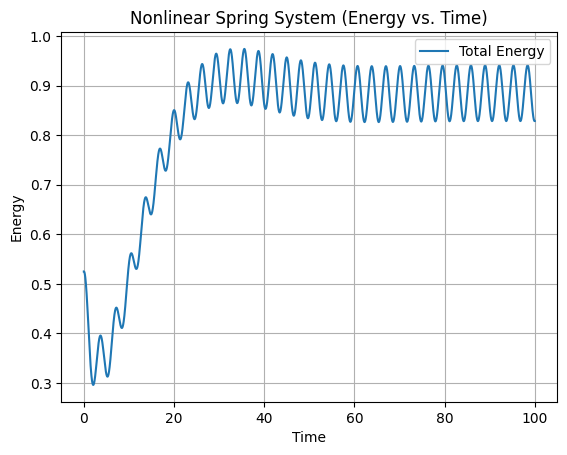

In [ ]:
# Compute kinetic and potential energy
kinetic_energy = 0.5 * m * v**2
potential_energy = 0.5 * k * x**2 + 0.25 * alpha * x**4
total_energy = kinetic_energy + potential_energy

# Plot total energy vs. time
plt.figure()
plt.plot(t, total_energy, label='Total Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Nonlinear Spring System (Energy vs. Time)')
plt.legend()
plt.grid(True)
plt.show()


# Bifurcation Diagram
To create a bifurcation diagram, we need to vary a parameter (e.g.,
𝛿
δ) and observe the system's long-term behavior:

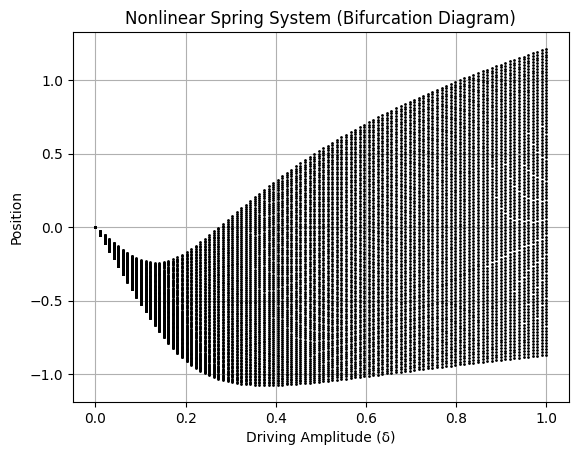

In [ ]:
# Bifurcation diagram parameters
delta_values = np.linspace(0, 1, 100)
x_bifurcation = []

# Loop over delta values
for delta in delta_values:
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    x[0] = 1.0
    v[0] = 0.0
    for i in range(1, len(t)):
        v[i] = v[i-1] + delta_t * acceleration(x[i-1], v[i-1], t[i-1])
        x[i] = x[i-1] + delta_t * v[i-1]
    # Append last 100 values to bifurcation diagram
    x_bifurcation.append(x[-100:])

# Plot bifurcation diagram
plt.figure()
for i, delta in enumerate(delta_values):
    plt.plot([delta] * 100, x_bifurcation[i], 'ko', ms=1)
plt.xlabel('Driving Amplitude (δ)')
plt.ylabel('Position')
plt.title('Nonlinear Spring System (Bifurcation Diagram)')
plt.grid(True)
plt.show()


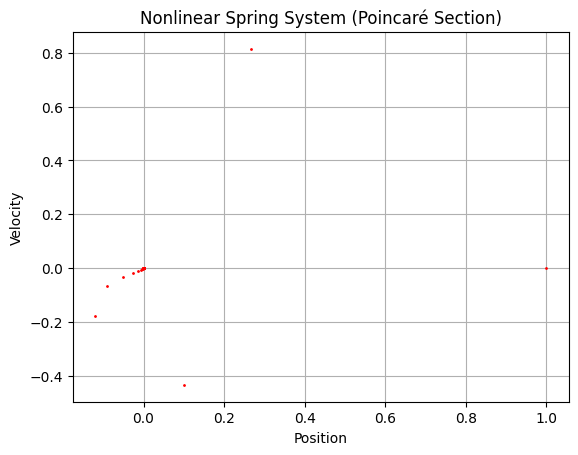

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the spring system
m = 1.0
c = 0.2
k = 1.0
alpha = 5.0  # Increase nonlinearity
omega = 1.0
delta = 0.0  # Increase driving force
delta_t = 0.001
t_max = 1000  # Extend simulation time
t = np.arange(0, t_max, delta_t)

# Initial conditions
x = np.zeros_like(t)
v = np.zeros_like(t)
x[0] = 1.0
v[0] = 0.0

# Define the acceleration function with driving force
def acceleration_with_drive(x, v, t):
    return - (c * v + k * x + alpha * x**3) / m + delta * np.cos(omega * t)

# Euler method with driving force
for i in range(1, len(t)):
    v[i] = v[i-1] + delta_t * acceleration_with_drive(x[i-1], v[i-1], t[i-1])
    x[i] = x[i-1] + delta_t * v[i-1]

# Calculate the driving period
T = 2 * np.pi / omega

# Initialize lists to hold the Poincaré section points
poincare_x = []
poincare_v = []

# Sample the system's state at intervals of the driving period
for i in range(len(t)):
    if np.abs(t[i] % T) < delta_t:
        poincare_x.append(x[i])
        poincare_v.append(v[i])

# Plot Poincaré section
plt.figure()
plt.plot(poincare_x, poincare_v, 'ro', ms=1)
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Nonlinear Spring System (Poincaré Section)')
plt.grid(True)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'omega_variation/poincare_omega_0.500.png'

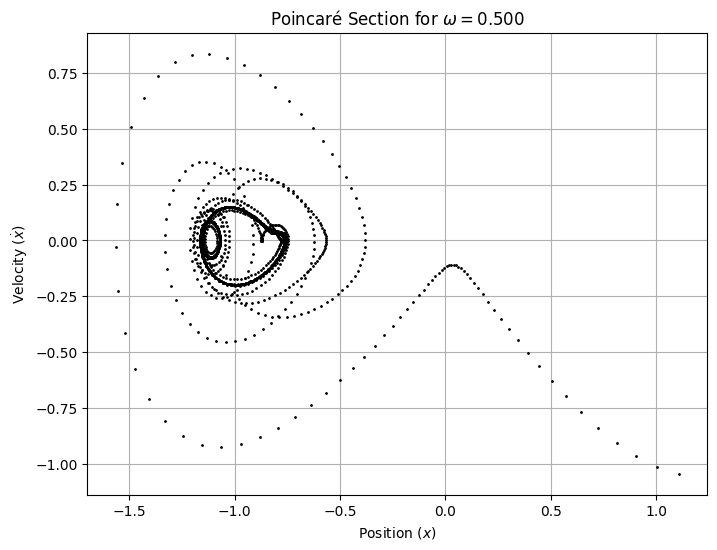

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib.image as mpimg


# Duffing Oscillator Parameters
alpha = -1       # Linear stiffness coefficient
beta = 1         # Nonlinear stiffness coefficient
gamma = 0.3      # Amplitude of the driving force
delta = 0.15     # Damping coefficient
omega_vals = np.linspace(0.5, 1.5, 10)  # Varying angular frequency of the periodic driving force

# Function defining the derivatives of the system
def duffing_derivatives(state, t, omega):
    x, y, phase = state
    dxdt = y
    dydt = gamma * np.cos(omega * t) - alpha * x - beta * x**3 - delta * y
    dphasedt = omega
    return [dxdt, dydt, dphasedt]

# Initial conditions for position, velocity, and phase
initial_position = np.random.rand()
initial_velocity = np.random.rand()
initial_phase = 0
initial_state = [initial_position, initial_velocity, initial_phase]

# Settle-down period to reach steady state
settle_time = np.linspace(0, 2000, 40000)
transient_solution = integrate.odeint(duffing_derivatives, initial_state, settle_time, args=(omega_vals[0],))
steady_state = transient_solution[-1, :]

# Main simulation over a longer time span for bifurcation analysis
main_time = np.linspace(1, 40000, 400000)

# # Specific omega values to save plots for
# specific_omega_values = [0.750, 1.000, 1.250]


# Loop through each omega value
for omega in omega_vals:
    solution = integrate.odeint(duffing_derivatives, steady_state, main_time, args=(omega,))
    positions = solution[:, 0]
    velocities = solution[:, 1]


    plt.figure(figsize=(8, 6))
    plt.plot(positions[:2000], velocities[:2000], 'ko', markersize=1)
    plt.title(fr'Poincaré Section for $\omega = {omega:.3f}$')
    plt.xlabel('Position ($x$)')
    plt.ylabel(r'Velocity ($\dot{x}$)')
    plt.grid(True)
    plt.savefig(f'omega_variation/poincare_omega_{omega:.3f}.png')
    plt.close()

# Display or save aggregated bifurcation diagram if desired
plt.figure(figsize=(10, 6))
for omega in omega_vals:
    img = mpimg.imread(f'omega_variation/poincare_omega_{omega:.3f}.png')
    data = img.mean(axis=2)  # Convert RGB to grayscale
    x_values = omega * np.ones_like(data[:, 0])  # Ensure x_values and y_values have the same length
    y_values = np.arange(data.shape[0])
    plt.scatter(x_values, y_values, s=1, color='black')

# plt.title('Bifurcation Diagram of Duffing Oscillator')
# plt.xlabel(r'Angular Frequency of Periodic Driving Force ($\omega$)')
# plt.ylabel(r'Average Velocity ($\langle \dot{x} \rangle$) at Poincaré Section')
# plt.grid(True)
# plt.savefig('omega_bifurcation_diagram.png')
# plt.show()


In [ ]:
import torch
import torch.nn as nn
#Define the LSTM model
class LSTMmodel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(LSTMmodel,self).__init__()
        self.lstm=nn.LSTM(input_size,hidden_size,num_layers,batch_first=True)
        self.fc=nn.Linear(hidden_size,output_size)

    def forward(self,x):
        #Initialize hidden_state and cell_state with zeros
        h_0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c_0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        #Forward propagate LSTM
        out, _ = self.lstm(x, (h_0, c_0))

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out
# Define Loss functions
#1 Mean squared error loss
def mse_loss(y_pred,y_true):
    return torch.mean((y_pred - y_true) ** 2)

#2 Physics informed loss
def physics_loss(x, v, t, c, k, alpha, delta, omega, m):
    a_pred = (-c * v - k * x - alpha * x**3 + delta * torch.cos(omega * t)) / m
    a_true = torch.gradient(v, t)
    return torch.mean((a_pred - a_true) ** 2)





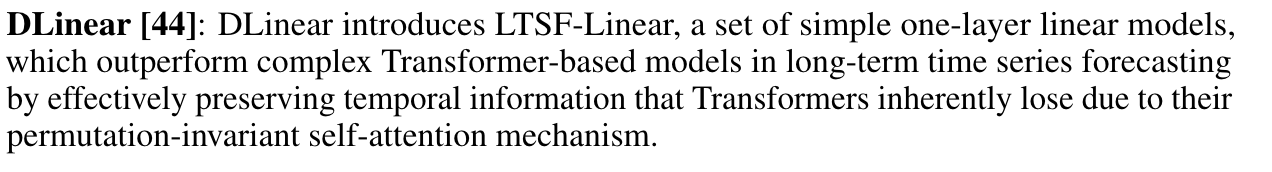

# Generate Data

In [5]:
import numpy as np
# Parameters for the spring system
m = 1.0        # Mass
k = 1.0        # Spring constant for linear stiffness
c = 0.2        # Damping coefficient
alpha = 0.2    # Nonlinear stiffness, alpha parameter
omega = 1.0    # Angular frequency of driving force
delta = 0.3    # Driving force's amplitude
# time parameters
delta_t=0.01 # time step
t_max=100 # maximum time
t=np.arange(0,t_max,delta_t) # time array

# Function to calculate acceleration
def acceleration(x,v,t):
    return - (c * v + k * x + alpha * x**3) / m + delta * np.cos(omega * t)

# Function to generate data
def generate_data(initial_conditions):
    x=np.zeros_like(t) # array of positions
    v=np.zeros_like(t) # array of velocities
    x[0],v[0]=initial_conditions

    for i in range(1, len(t)):  #Runge-kutta of 4th order
        # Calculate RK4 coefficients for position and velocity
        k1x = delta_t * v[i-1]
        k1v = delta_t * acceleration(x[i-1], v[i-1], t[i-1])

        k2x = delta_t * (v[i-1] + 0.5 * k1v)
        k2v = delta_t * acceleration(x[i-1] + 0.5 * k1x, v[i-1] + 0.5 * k1v, t[i-1] + 0.5 * delta_t)

        k3x = delta_t * (v[i-1] + 0.5 * k2v)
        k3v = delta_t * acceleration(x[i-1] + 0.5 * k2x, v[i-1] + 0.5 * k2v, t[i-1] + 0.5 * delta_t)

        k4x = delta_t * (v[i-1] + k3v)
        k4v = delta_t * acceleration(x[i-1] + k3x, v[i-1] + k3v, t[i-1] + delta_t)

        x[i] = x[i-1] + (k1x + 2*k2x + 2*k3x + k4x) / 6
        v[i] = v[i-1] + (k1v + 2*k2v + 2*k3v + k4v) / 6


    return x,v
if __name__=="__main__":
    initial_conditions_list= [(1.0, 0.0), (0.0, 1.0), (0.5, -0.5), (-1.0, 0.5)]
    !mkdir data
    for in_cond in initial_conditions_list:
        x,v=generate_data(in_cond)
        np.savez(f"data/simulation_{in_cond}.npz", x=x, v=v)

# DLinear Model

In [47]:
import torch
import torch.nn as nn

class MovingAvg(nn.Module):
    def __init__(self, kernel_size, stride=1):
        super(MovingAvg, self).__init__()
        self.kernel_size = kernel_size
        self.avg = nn.AvgPool1d(kernel_size=kernel_size, stride=stride, padding=0)

    def forward(self, x):
        # Pad the input at both ends to maintain the original sequence length
        front = x[:, :, 0:1].repeat(1, 1, (self.kernel_size - 1) // 2)
        end = x[:, :, -1:].repeat(1, 1, (self.kernel_size - 1) // 2)
        x = torch.cat([front, x, end], dim=2)
        x = self.avg(x)
        return x

class SeriesDecomp(nn.Module):
    def __init__(self, kernel_size):
        super(SeriesDecomp, self).__init__()
        self.moving_avg = MovingAvg(kernel_size)

    def forward(self, x):
        moving_mean = self.moving_avg(x)
        res = x - moving_mean
        return res, moving_mean

class DLinear(nn.Module):
    def __init__(self, seq_len, pred_len, channels=2):
        super(DLinear, self).__init__()
        self.seq_len = seq_len
        self.pred_len = pred_len
        self.channels = channels

        kernel_size = 25
        self.decomposition = SeriesDecomp(kernel_size)

        self.Linear_Seasonal = nn.Linear(channels*seq_len, channels*pred_len)
        self.Linear_Trend = nn.Linear(channels, pred_len)

    def forward(self, x):
        # Ensure the input shape is [Batch, Channels, Seq_len]
        x = x.permute(0, 2, 1)

        # Decompose the input into seasonal and trend components
        seasonal_init, trend_init = self.decomposition(x)


        # Apply linear layers to both components
        seasonal_output = self.Linear_Seasonal(seasonal_init.permute(0, 2, 1).reshape(seasonal_init.shape[0],-1)).reshape(seasonal_init.shape[0], self.pred_len, self.channels) # Reshape to match trend output
        trend_output = self.Linear_Trend(trend_init.permute(0, 2, 1)[:,0,:]) # Select one element from the trend component for each channel

        # Combine the outputs and return to [Batch, Output_len, Channels] shape
        x = seasonal_output + trend_output.unsqueeze(-1) # Add a dimension to trend_output to enable broadcasting
        return x


# Train

Epoch [10/150], Loss: 0.1595
Epoch [20/150], Loss: 0.0107
Epoch [30/150], Loss: 0.0074
Epoch [40/150], Loss: 0.0046
Epoch [50/150], Loss: 0.0023
Epoch [60/150], Loss: 0.0010
Epoch [70/150], Loss: 0.0004
Epoch [80/150], Loss: 0.0002
Epoch [90/150], Loss: 0.0001
Epoch [100/150], Loss: 0.0001
Epoch [110/150], Loss: 0.0001
Epoch [120/150], Loss: 0.0001
Epoch [130/150], Loss: 0.0001
Epoch [140/150], Loss: 0.0001
Epoch [150/150], Loss: 0.0001


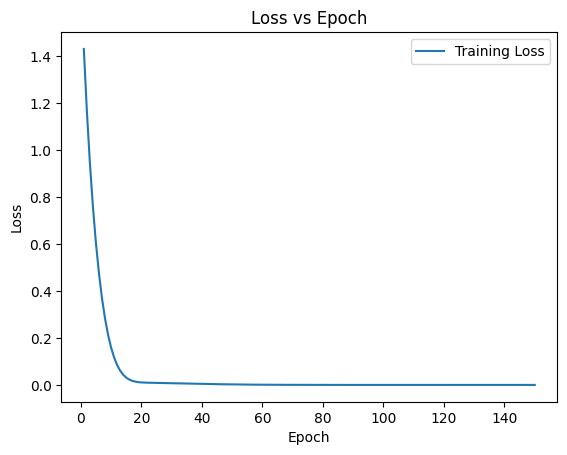

In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset

import matplotlib.pyplot as plt

# Hyperparameters
seq_len = 1000
pred_len = 200
batch_size = 32
epochs = 150
learning_rate = 0.0001

# Load and prepare data
data = np.load('data/simulation_(1.0, 0.0).npz')
x = data['x']
v = data['v']
data = np.stack((x, v), axis=1)

# Prepare dataset
x_train = []
y_train = []

for i in range(len(data) - seq_len - pred_len):
    x_train.append(data[i:i+seq_len])
    y_train.append(data[i+seq_len:i+seq_len+pred_len])

x_train = np.array(x_train)
y_train = np.array(y_train)

# Normalize data
data_mean = np.mean(x_train)
data_std = np.std(x_train)
x_train = (x_train - data_mean) / data_std
y_train = (y_train - data_mean) / data_std

train_dataset = TensorDataset(torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize model, loss function, and optimizer
model = DLinear(seq_len, pred_len)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
losses = []
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    epoch_loss /= len(train_loader)
    losses.append(epoch_loss)
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}')

# Save the model and losses
torch.save(model.state_dict(), 'DLinear_model.pth')
np.save('losses.npy', losses)

# Plot loss vs. epoch
plt.figure()
plt.plot(range(1, epochs + 1), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.show()


# Test

Test Loss: 0.0003
Test MAE: 0.0085


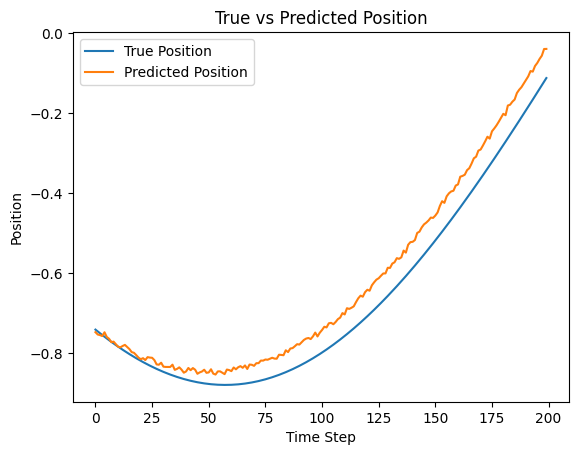

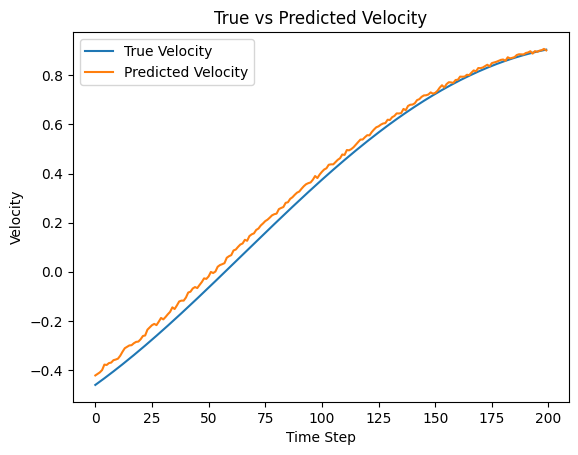

In [55]:
import torch
import numpy as np
import matplotlib.pyplot as plt
# from model import DLinear

# Parameters for the spring system
m = 1.0
k = 1.0
c = 0.2
alpha = 0.2
omega = 1.0
delta = 0.3

delta_t = 0.01
t_max = 100
t = np.arange(0, t_max, delta_t)
# Calculate the mean and standard deviation of the training data and save them
train_data_mean = np.mean(x_train)
train_data_std = np.std(x_train)
np.save('data_mean.npy', train_data_mean)
np.save('data_std.npy', train_data_std)

def acceleration(x, v, t):
    return - (c * v + k * x + alpha * x**3) / m + delta * np.cos(omega * t)

def generate_data(initial_conditions):
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    x[0], v[0] = initial_conditions

    for i in range(1, len(t)):
        k1x = delta_t * v[i-1]
        k1v = delta_t * acceleration(x[i-1], v[i-1], t[i-1])

        k2x = delta_t * (v[i-1] + 0.5 * k1v)
        k2v = delta_t * acceleration(x[i-1] + 0.5 * k1x, v[i-1] + 0.5 * k1v, t[i-1] + 0.5 * delta_t)

        k3x = delta_t * (v[i-1] + 0.5 * k2v)
        k3v = delta_t * acceleration(x[i-1] + 0.5 * k2x, v[i-1] + 0.5 * k2v, t[i-1] + 0.5 * delta_t)

        k4x = delta_t * (v[i-1] + k3v)
        k4v = delta_t * acceleration(x[i-1] + k3x, v[i-1] + k3v, t[i-1] + delta_t)

        x[i] = x[i-1] + (k1x + 2*k2x + 2*k3x + k4x) / 6
        v[i] = v[i-1] + (k1v + 2*k2v + 2*k3v + k4v) / 6

    return x, v

#  novel initial conditions for test data
initial_conditions_list = [(0.7, -0.3), (1.5, -1.0), (-0.5, 0.8), (0.2, -0.7)]

#  new data for evaluation with diverse initial conditions
x_test_data = []
y_test_data = []

for initial_conditions in initial_conditions_list:
    x, v = generate_data(initial_conditions)
    new_data = np.stack((x, v), axis=1)

    # Normalize new data using training data statistics
    train_data_mean = np.load('data_mean.npy')
    train_data_std = np.load('data_std.npy')
    new_data = (new_data - train_data_mean) / train_data_std

    for i in range(len(new_data) - seq_len - pred_len):
        x_test_data.append(new_data[i:i+seq_len])
        y_test_data.append(new_data[i+seq_len:i+seq_len+pred_len])

x_test_data = np.array(x_test_data)
y_test_data = np.array(y_test_data)

# Load model and evaluate
model = DLinear(seq_len, pred_len)
model.load_state_dict(torch.load('DLinear_model.pth'))
model.eval()

test_input = torch.tensor(x_test_data, dtype=torch.float32)
test_output = torch.tensor(y_test_data, dtype=torch.float32)

with torch.no_grad():
    predictions = model(test_input)

# Calculate MSE loss
mse_loss = nn.MSELoss()
loss = mse_loss(predictions, test_output)
print(f'Test Loss: {loss.item():.4f}')
# Calculate Mean Absolute Error (MAE) for a more interpretable metric
mae_loss = nn.L1Loss()
mae = mae_loss(predictions, test_output)
print(f'Test MAE: {mae.item():.4f}')
# Plot predictions vs. true values for the first sample
plt.figure()
plt.plot(test_output[0, :, 0].numpy(), label='True Position')
plt.plot(predictions[0, :, 0].numpy(), label='Predicted Position')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.title('True vs Predicted Position')
plt.legend()
plt.show()

plt.figure()
plt.plot(test_output[0, :, 1].numpy(), label='True Velocity')
plt.plot(predictions[0, :, 1].numpy(), label='Predicted Velocity')
plt.xlabel('Time Step')
plt.ylabel('Velocity')
plt.title('True vs Predicted Velocity')
plt.legend()
plt.show()
